In [14]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set a random seed
np.random.seed(42)

In [2]:
a = 0
b = np.pi
n=11

h = (b-a)/n-1

x = np.linspace(a, b, n)
f = np.sin(x)

In [4]:
f

array([0.00000000e+00, 3.09016994e-01, 5.87785252e-01, 8.09016994e-01,
       9.51056516e-01, 1.00000000e+00, 9.51056516e-01, 8.09016994e-01,
       5.87785252e-01, 3.09016994e-01, 1.22464680e-16])

In [5]:
def calculate_integral(f, a, b, n):
    '''Calculates the integral based on the composite trapezoidal rule
    relying on the Riemann Sums.
    :param function f: the integrand function
    :param int a: lower bound of the integral
    :param int b: upper bound of theintergal
    :param int n: number of trapezoids of equal width
    :return float: the integral of the function f between a and b
    '''
    w = (b - a)/n
    result = 0.5*f(a) + sum([f(a + i*w) for i in range(1, n)]) + 0.5*f(b)
    result *= w
    return result

In [19]:
f = lambda x: 4.0/(1 + x**2)  # specify a function to integrate
a, b = 0, 1  # the intervals of integration
N = 400  # number of points to generate
factor = 10  # increase num of trapezoids every iteration

X = np.linspace(a, b, N + 1)  # generate more points on the x-axis
Y = f(X)  # generate more function values

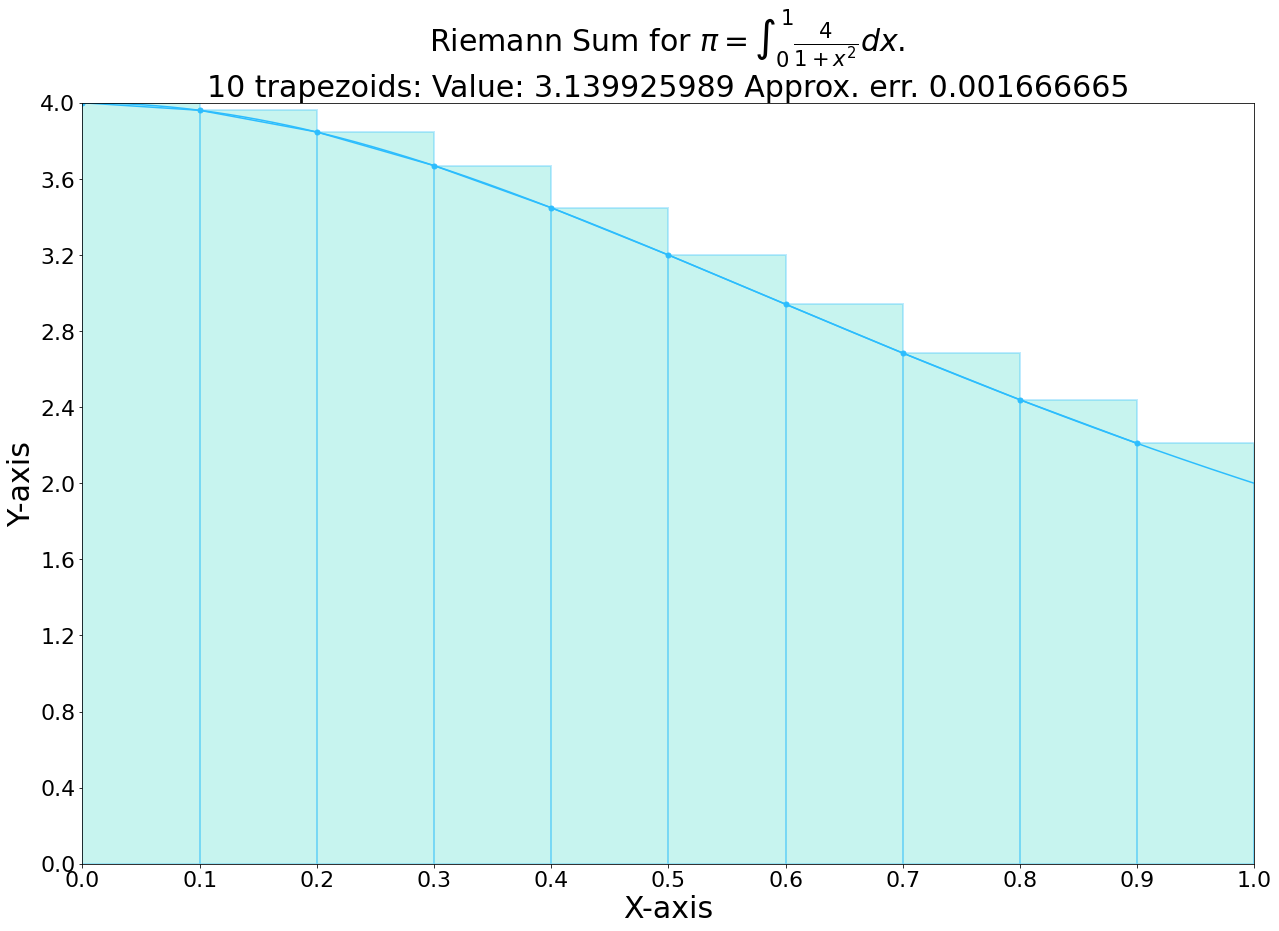

In [20]:
fig = plt.figure(figsize=(21, 14))  # make a new figure

# animation function 
def animate(i):
    plt.cla()  # clear all previous axes objects
    ax = plt.axes(xlim=(a, b), ylim = (0, 4))  # make a new axes object
    
    ax.set_xticks(np.linspace(a, b, 11))  # format the x-axis
    ax.set_xlabel('X-axis', fontsize=30)
    
    ax.set_yticks(np.linspace(0, 4, 11))  # format the y-axis
    ax.set_ylabel('Y-axis', fontsize=30)
    
    ax.tick_params(labelsize=22)  # make the ticks larger
    
    num_trapezoids = (i + 1) * factor  # calculate the number of trapezoids
    
    x = np.linspace(a, b, num_trapezoids + 1)  # generate the intervals on the x-axis
    y = f(x)  # generate the function values
    
    y_int = calculate_integral(f, a, b, num_trapezoids)  # calculate the integral
    err = np.abs(np.pi - y_int)  # calculate the absolute error
    
    # take the left end-points
    x_left = x[:-1]
    y_left = y[:-1]
    
    ax.plot(x_left,y_left, c='#2CBDFE', marker='.', markersize=10)  # plot the left points
    ax.plot(X, Y, c='#2CBDFE')  # plot the smoother line
    
    bar = ax.bar(x, y, width=1.0*(b-a)/num_trapezoids, alpha=0.3, align='edge', color='#47DBCD', edgecolor='#2CBDFE', lw=2)
    ax.set_title('Riemann Sum for $\pi = \int_{{0}}^{{1}} \\frac{{4}}{{1 + x^2}}dx$. \n' + 
                 '{0} trapezoids: Value: {1:.9f} Approx. err. {2:.9f}'.format(num_trapezoids, y_int, err), fontsize=30)
    
    return bar

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=40, interval=120, blit=True)
# anim.save('riemann_sum.gif',writer="imagemagick")